In [14]:
#!/usr/bin/env python
import subprocess
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [15]:
'''
    Testing flood for SMTP (aport=25)
'''
p = subprocess.run("rwfilter ./mysterious-dataset.rw --aport=25 --pass=stdout  --type=all | rwuniq --fields=sTime --sort-output --flows --no-columns --column-separator=' ' --no-title",
                    capture_output=True,
                    shell=True
                )

# I have had some problems using (rwfilter with SILK_DATA_ROOTDIR even with right silk.conf configurations) 
# the start-date and end-date filtering, problems which I don't know where they come from or how to solve.

# --start-date=2014/11/24:16 --end-date=2014/11/24:17
# --start-date=2014/11/24:16 --end-date=2014/12/01:13

if p.stderr:
    raise p.stderr.decode()

out = p.stdout.decode()

/tmp/ipykernel_460/2971842656.py:25: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax.locator_params(axis='x', nbins=10)


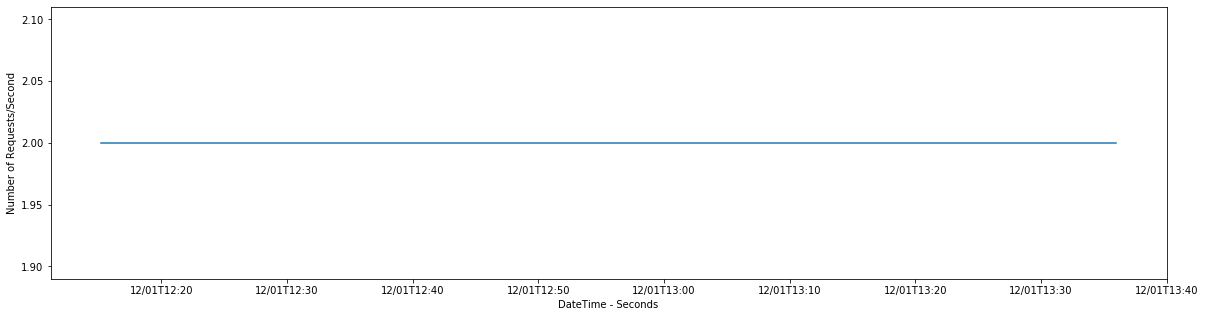

['2014/12/01T12:15:13 2 ', '2014/12/01T12:16:11 2 ', '2014/12/01T12:18:09 2 ', '2014/12/01T12:19:13 2 ', '2014/12/01T12:20:38 2 ', '2014/12/01T12:21:19 2 ', '2014/12/01T12:29:31 2 ', '2014/12/01T13:21:03 2 ', '2014/12/01T13:22:14 2 ', '2014/12/01T13:23:37 2 ', '2014/12/01T13:25:34 2 ', '2014/12/01T13:27:23 2 ', '2014/12/01T13:35:58 2 ']


In [16]:
# key = x = dates
# values = y = count
dates_in_seconds = dict()
t = out.splitlines()
for l in t:
    date_time,count = l.strip().split(' ')
    dt = datetime.strptime(date_time, '%Y/%m/%dT%H:%M:%S')
    dates_in_seconds[dt] = int(count)


# seconds
lx = list(dates_in_seconds.keys())
y = list(dates_in_seconds.values())
x = pd.to_datetime(lx)


fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,1,1)

ax.plot(x.to_pydatetime(), y)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%dT%H:%M'))

ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=7)
ax.set_xlabel("DateTime - Seconds")
ax.set_ylabel("Number of Requests/Second")

plt.show()
print(t)

The requests are rare and not exaggerated in quantity. Saying this, we can conclude that there is no SMTP Flood occurring.